<a href="https://colab.research.google.com/github/JJ-Indian/MachineHack-Bootcamp/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.re.v

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
X = data.iloc[:,:-1].values

In [6]:
y = data.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1302, shuffle=True, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-1.13588314, -0.21193895,  0.55681936, ...,  1.54210011,
        -0.90862605, -0.53625609],
       [-0.54837254, -0.68851622, -0.88387082, ..., -0.94627272,
         0.51775652, -1.03949056],
       [ 0.03913806, -0.33902622,  1.17425801, ...,  0.70417864,
        -0.83578949, -0.28463886],
       ...,
       [ 0.03913806, -0.84737531, -0.21497895, ..., -0.93357694,
        -0.96628832, -1.03949056],
       [ 2.09542514, -1.13332166,  0.24810004, ..., -0.24800483,
        -0.50499013,  0.1347232 ],
       [ 0.33289335,  0.48704104,  0.6597258 , ..., -4.06943453,
         0.52686109,  2.98638518]])

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred = lr.predict(X_test)

In [11]:
pd.DataFrame(data={'Predicted Profit': y_pred, 'Actual Profit': y_test})

,Predicted Profit,Actual Profit
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
95,0,0
96,0,1
97,0,0
98,1,1


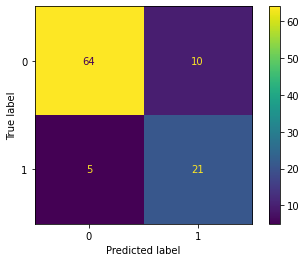

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_pred,y_test,  labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.85

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        69
           1       0.81      0.68      0.74        31

    accuracy                           0.85       100
   macro avg       0.84      0.80      0.82       100
weighted avg       0.85      0.85      0.85       100

